<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-data" data-toc-modified-id="Import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#datafrom-version" data-toc-modified-id="datafrom-version-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>datafrom version</a></span></li><li><span><a href="#relationship-version" data-toc-modified-id="relationship-version-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>relationship version</a></span></li></ul></li><li><span><a href="#All-labels-frequency-analysis" data-toc-modified-id="All-labels-frequency-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>All labels frequency analysis</a></span><ul class="toc-item"><li><span><a href="#The-frequent-number-of-clusters" data-toc-modified-id="The-frequent-number-of-clusters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The frequent number of clusters</a></span></li><li><span><a href="#The-frequent-labels-used" data-toc-modified-id="The-frequent-labels-used-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The frequent labels used</a></span></li></ul></li><li><span><a href="#HAC-(hierarchical-agglomerative-clustering)" data-toc-modified-id="HAC-(hierarchical-agglomerative-clustering)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>HAC (hierarchical agglomerative clustering)</a></span><ul class="toc-item"><li><span><a href="#combine-all-labels-into-one-dataframe" data-toc-modified-id="combine-all-labels-into-one-dataframe-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>combine all labels into one dataframe</a></span></li><li><span><a href="#first-clustering-analysis" data-toc-modified-id="first-clustering-analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>first clustering analysis</a></span></li><li><span><a href="#second-clustering-analysis" data-toc-modified-id="second-clustering-analysis-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>second clustering analysis</a></span></li></ul></li><li><span><a href="#Different-clusters-of-labels-frequency-analysis" data-toc-modified-id="Different-clusters-of-labels-frequency-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Different clusters of labels frequency analysis</a></span><ul class="toc-item"><li><span><a href="#6-clusters-model" data-toc-modified-id="6-clusters-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>6 clusters model</a></span></li><li><span><a href="#3-clusters-model" data-toc-modified-id="3-clusters-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>3 clusters model</a></span></li></ul></li><li><span><a href="#Each-participant's-answer" data-toc-modified-id="Each-participant's-answer-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Each participant's answer</a></span></li></ul></div>

In [1]:
import glob
from scipy.io import loadmat
import pandas as pd
import numpy as np

#Hierarchical agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [2]:
# Meadows ID and corresponding fMRI ID
meadows_soc_id_key = pd.read_csv('../input_data/meadows_data/participants.csv',index_col=0)
# Create a list of paths for each subject's data
ca_subj_data_paths = glob.glob('../input_data/meadows_data/meadows_subject_data/*.csv')
ma_subj_data_paths = glob.glob('../input_data/meadows_data/meadows_subject_data/*.mat')

# Preprocessing

## datafrom version

In [5]:
num = 10 #depend on specific file path
#The dataframe of following subjects had no index, which resulted in a few relationships failing to be recorded.
subj_no_list = []
meadows_id_no_list = []
for subj in ca_subj_data_paths:
    subj_cat_df = pd.read_csv(subj)
    if subj_cat_df.iloc[0,0] != 0:
        if meadows_soc_id_key[meadows_soc_id_key['meadows_id'] == subj.split('_')[num]].index.empty:
            continue
        else:  # If match is found, this runs
            soc_id = meadows_soc_id_key[meadows_soc_id_key['meadows_id'] == subj.split('_')[num]].index[0]
            soc_id = soc_id.replace('soc','sub')
            meadows_id = subj.split('_')[9]

        subj_no_list.append(soc_id)
        meadows_id_no_list.append(meadows_id)
        
# print(len(subj_no_list))
# subj_no_list

## relationship version

In [6]:
mat = loadmat(ma_subj_data_paths[30])
    
# Extract each social relationship stimuli and clean them up
relationships_v1=[]
for i in mat['stimuli']:
    temp_str = i.replace('  ','')
    temp_str = temp_str.strip()
    relationships_v1.append(temp_str)

In [7]:
mat = loadmat(ma_subj_data_paths[56])
    
# Extract each social relationship stimuli and clean them up
relationships_v2=[]
for i in mat['stimuli']:
    temp_str = i.replace('  ','')
    temp_str = temp_str.strip()
    relationships_v2.append(temp_str)

In [8]:
relationships = relationships_v1
set(relationships_v2)-set(relationships_v1)

{'Alumni',
 'Co-workers',
 'Cohabitants',
 'Companions',
 'Confidants',
 'Cousins',
 'Diplomats',
 'Frenemies',
 'Half-siblings',
 'Peers',
 'Person - Significant other',
 'Person - Social media follower',
 'Playmates',
 'Second-cousins',
 'Siblings',
 'Step-siblings',
 'Twins'}

In [9]:
#In categorization task, there were two different versions in labels of relationships, which were shown above.
#This function is used to turn relationships in version 2 into version 1.
def rel_v2_to_v1(rel_list):
    rel_list = [i.replace('Diplomats', 'Between Diplomats') for i in rel_list]
    rel_list = [i.replace('Second-cousins', 'Between Second-cousins') for i in rel_list]
    rel_list = [i.replace('Co-workers', 'Between Co-workers') for i in rel_list]
    rel_list = [i.replace('Person - Significant other', 'Person - their Significant other') for i in rel_list]
    rel_list = [i.replace('Step-siblings', 'Between Step-siblings') for i in rel_list]
    rel_list = [i.replace('Twins', 'Between Twins') for i in rel_list]
    rel_list = [i.replace('Frenemies', 'Between Frenemies') for i in rel_list]
    rel_list = [i.replace('Alumni', 'Between Alumni') for i in rel_list]
    rel_list = [i.replace('Playmates', 'Between Playmates') for i in rel_list]
    rel_list = [i.replace('Half-siblings', 'Between Half-siblings') for i in rel_list]
    rel_list = [i.replace('Peers', 'Between Peers') for i in rel_list]
    rel_list = [i.replace('Companions', 'Between Companions') for i in rel_list]
    rel_list = [i.replace('Person - Social media follower', 'Person - their Social media follower') for i in rel_list]
    rel_list = [i.replace('Cousins', 'Between Cousins') for i in rel_list]
    rel_list = [i.replace('Confidants', 'Between Confidants') for i in rel_list]
    rel_list = [i.replace('Siblings', 'Between Siblings') for i in rel_list]
    return rel_list

# All labels frequency analysis

In [10]:
label_list = []
cluster_num = []
for subj in ca_subj_data_paths:
    
    if meadows_soc_id_key[meadows_soc_id_key['meadows_id'] == subj.split('_')[num]].index.empty:
        continue
    else:  # If match is found, this runs
        soc_id = meadows_soc_id_key[meadows_soc_id_key['meadows_id'] == subj.split('_')[num]].index[0]
        soc_id = soc_id.replace('soc','sub')
        
    ############ different format of dataframe
    #Separate the two conditons where some had index of numbers while others not.
    if soc_id in subj_no_list:
        subj_cat_df = pd.read_csv(subj)
    else:
        subj_cat_df = pd.read_csv(subj).iloc[:, 1:]
    #Extract the label from each dataframe    
    label_list_temp = list(subj_cat_df.columns)
    [label_list.append(i) for i in label_list_temp]
    
    #Count the number of clusters
    temp_len = len(label_list_temp)
    cluster_num.append(temp_len)

## The frequent number of clusters

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count number of labels participants divided')

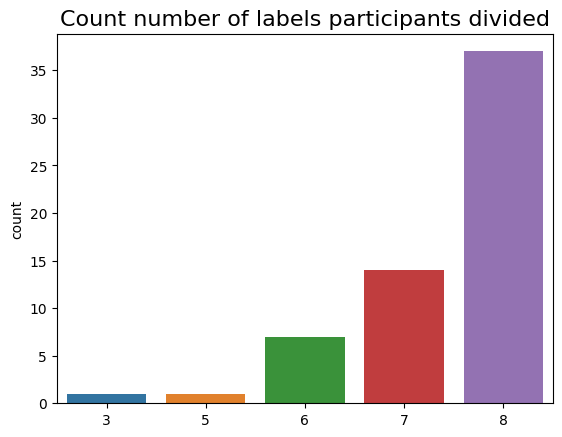

In [11]:
sns.countplot(cluster_num)
plt.title('Count number of labels participants divided',fontsize=16)

## The frequent labels used

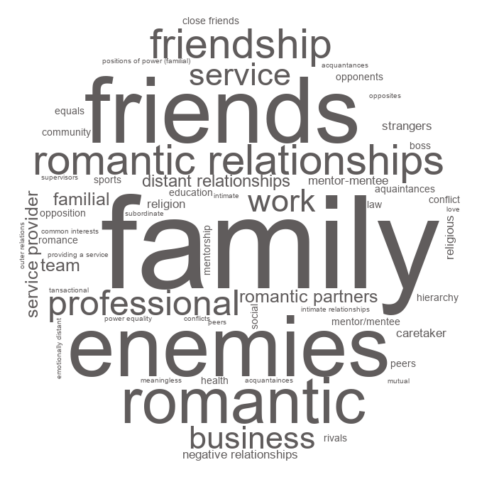

In [29]:
label_list = [i.lower() for i in label_list]
label_freq = {i:label_list.count(i) for i in set(label_list)}

mask = np.array(Image.open('circle.jpg'))
wc = WordCloud(background_color='white',width=400,height=400,mask=mask,
               font_path=r"C:\Windows\Fonts\Arial.ttf",
               mode='RGBA',color_func=lambda *args, **kwargs: "#605C5C",
               min_font_size = 10)
wc.fit_words(label_freq)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

In [22]:
#label_freq_sorted = sorted(label_freq,key=label_freq.get,reverse=True)
#Plot the top 10 labels
#for num in range(10):
#    print(label_freq_sorted[num],label_freq[label_freq_sorted[num]])

# HAC (hierarchical agglomerative clustering)

## combine all labels into one dataframe

In [14]:
num = 10
subj_label_dict = {}
for subj in ca_subj_data_paths:
    if meadows_soc_id_key[meadows_soc_id_key['meadows_id'] == subj.split('_')[num]].index.empty:
        continue
    else:  # If match is found, this runs
        soc_id = meadows_soc_id_key[meadows_soc_id_key['meadows_id'] == subj.split('_')[num]].index[0]
        soc_id = soc_id.replace('soc','sub')
        
    ############ different format of dataframe
    #Separate the two conditons where some had index of numbers while others not.
    if soc_id in subj_no_list:
        subj_cat_df = pd.read_csv(subj)
    else:
        subj_cat_df = pd.read_csv(subj).iloc[:, 1:]
    
    # Abstract the feature of each label
    target_df = pd.DataFrame(index=relationships)
    for label_col in subj_cat_df.columns:
        temp_label_list = list(subj_cat_df[label_col].dropna())                      
        temp_label_list = rel_v2_to_v1(temp_label_list)
        
        for rel in target_df.index:
            if rel in temp_label_list:
                target_df.loc[rel,label_col] = 1
            else:
                target_df.loc[rel,label_col] = 0
                
    subj_label_dict[soc_id] = target_df

In [16]:
import warnings
warnings.filterwarnings("ignore")
target_df_all = subj_label_dict[list(subj_label_dict.keys())[0]]
for subj in list(subj_label_dict.keys())[1:]:
    temp_df = subj_label_dict[subj]
    target_df_all = pd.merge(target_df_all,temp_df,
                            left_index=True, right_index=True)
target_df_all = target_df_all.transpose()
target_df_all.to_csv('labels_explicit_raw.csv')
target_df_all

Wife - Husband  Nurse - Patient  \
Boss_x                                    0.0              0.0   
Coach/leader                              0.0              0.0   
Healthcare                                0.0              1.0   
Police /soldier                           0.0              0.0   
Religion_x                                0.0              0.0   
...                                       ...              ...   
emotionally close                         0.0              0.0   
emotionally distant                       0.0              0.0   
rivalry                                   0.0              0.0   
sexual/intimate relationships             1.0              0.0   
intense power dynamics                    0.0              0.0   

                               Officer - Soldier  Neighbors  \
Boss_x                                       0.0        0.0   
Coach/leader                                 0.0        0.0   
Healthcare                                   0.0        0.0   
Police /soldier                              1.0        0.0   
Religion_x                                   0.0        0.0   
...                                          ...        ...   
emotionally close                            0.0        0.0   
emotionally distant                          0.0        0.0   
rivalry                                      0.0        0.0   
sexual/intimate relationships                0.0        0.0   
intense power dynamics                       0.0        0.0   

                               Athletic trainer - Trainee  \
Boss_x                                                0.0   
Coach/leader                                          1.0   
Healthcare                                            0.0   
Police /soldier                                       0.0   
Religion_x                                            0.0   
...                                                   ...   
emotionally close                                     0.0   
emotionally distant                                   0.0   
rivalry                                               0.0   
sexual/intimate relationships                         0.0   
intense power dynamics                                0.0   

                               Police officer - Offender  Principal - Teacher  \
Boss_x                                               0.0                  1.0   
Coach/leader                                         0.0                  0.0   
Healthcare                                           0.0                  0.0   
Police /soldier                                      1.0                  0.0   
Religion_x                                           0.0                  0.0   
...                                                  ...                  ...   
emotionally close                                    0.0                  0.0   
emotionally distant                                  0.0                  0.0   
rivalry                                              0.0                  0.0   
sexual/intimate relationships                        0.0                  0.0   
intense power dynamics                               1.0                  0.0   

                               Doctor - Nurse  Victim - Criminal  \
Boss_x                                    0.0                0.0   
Coach/leader                              0.0                0.0   
Healthcare                                0.0                0.0   
Police /soldier                           0.0                1.0   
Religion_x                                0.0                0.0   
...                                       ...                ...   
emotionally close                         0.0                0.0   
emotionally distant                       0.0                0.0   
rivalry                                   0.0                0.0   
sexual/intimate relationships             0.0                0.0   
intense power dynamics     

## first clustering analysis

<AxesSubplot: title={'center': 'Silhouette scores of first clustring analysis'}, xlabel='clusterCount', ylabel='silhouette'>

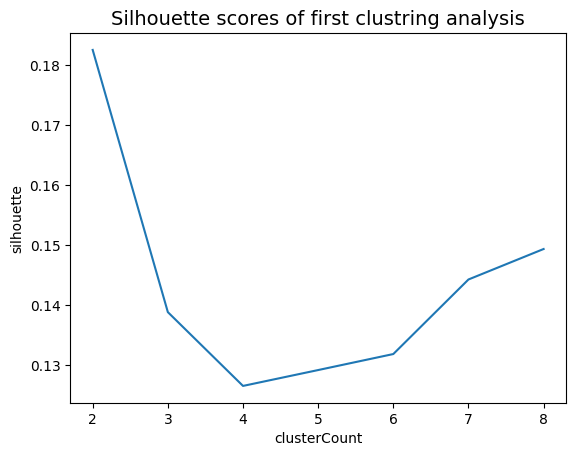

In [17]:
random_seed = 2022
maxClusters = 9
data = target_df_all

resultsdf = pd.DataFrame({'clusterCount':[], 'silhouette':[]})
for index, k in enumerate(range(2, maxClusters)):
    # linkage: 
    # ward: minimizes the variance of the clusters being merged.
    # average: uses the average of the distances of each observation of the two sets.
    # complete or maximum: uses the maximum distances between all observations of the two sets.
    # single: the minimum of the distances between all observations of the two sets.
    
    HAC_model = AgglomerativeClustering(n_clusters=k,linkage = 'ward').fit(data)
    cluster_labels = HAC_model.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    
    resultsdf = resultsdf.append({'clusterCount':k, 'silhouette':silhouette_avg}, ignore_index=True)
    
plt.title('Silhouette scores of first clustring analysis',size=14)
sns.lineplot(data=resultsdf, x="clusterCount", y="silhouette")

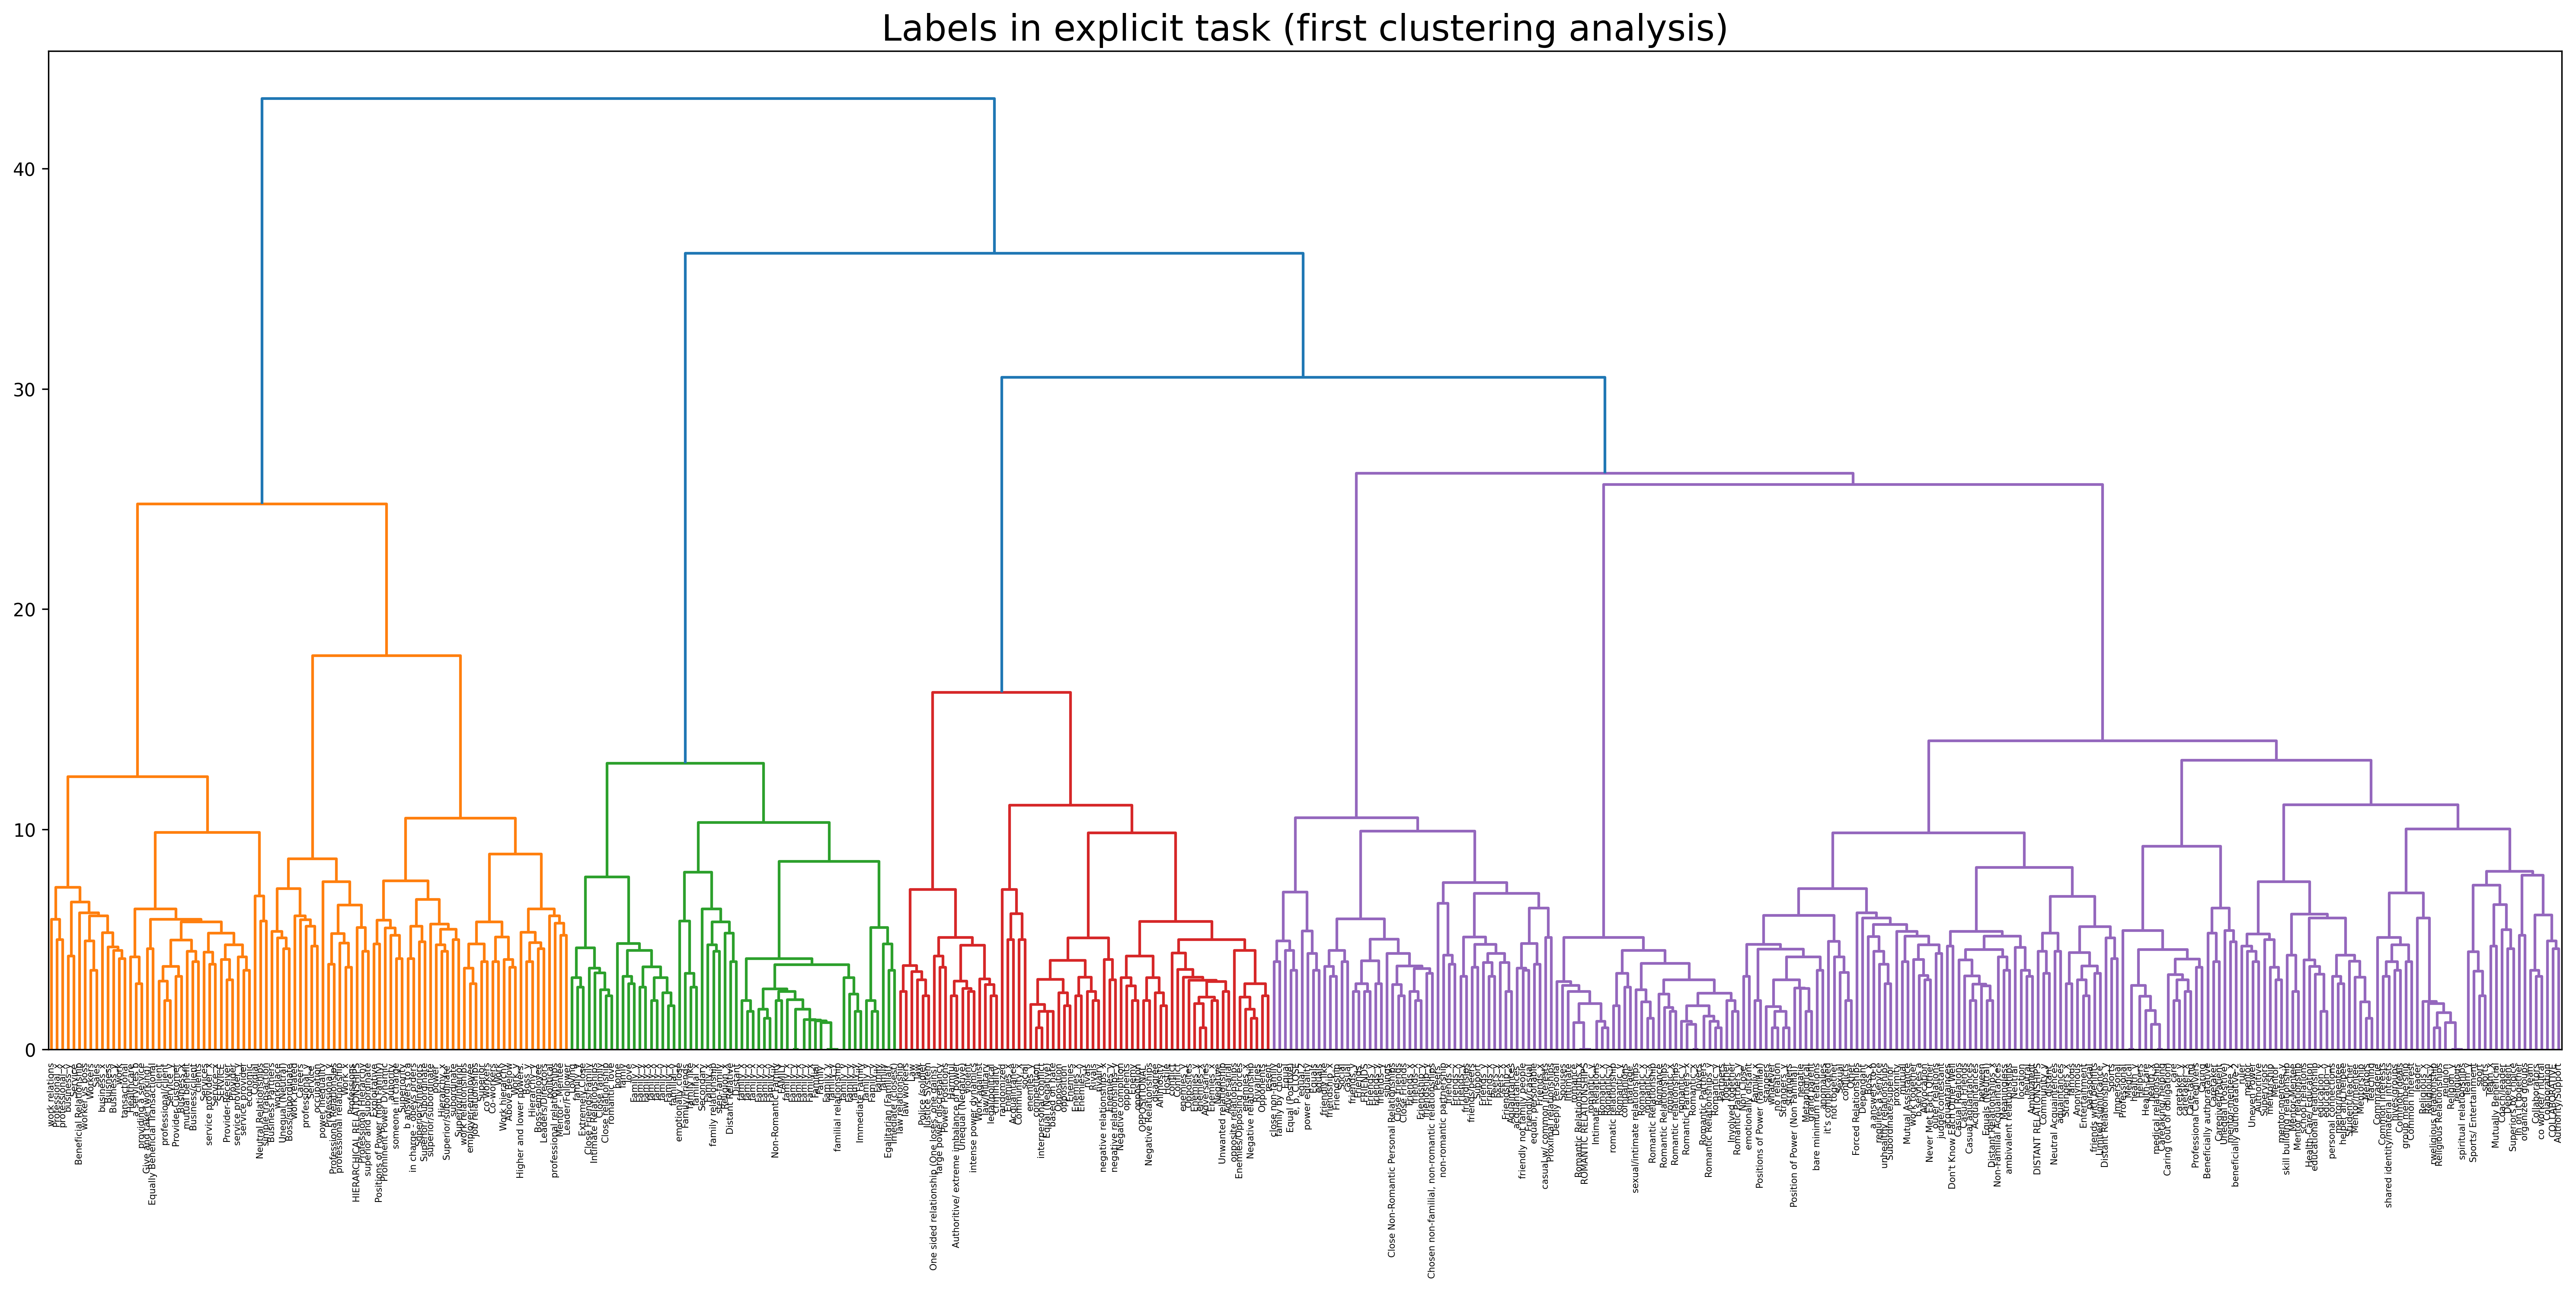

In [18]:
random_seed = 2022
data = target_df_all
plt.figure(figsize=(25, 10),dpi=300)
plt.title("Labels in explicit task (first clustering analysis)",size=20)  
dend = dendrogram(linkage(data, method='ward',metric='euclidean'),
                 labels = list(data.index)) 

In [19]:
data = target_df_all
ks = [3,4,5,6,7,8]
result_df = pd.DataFrame(index=data.index)
for k in ks:   
    HAC_model = AgglomerativeClustering(n_clusters=k,linkage = 'ward').fit(data)
    cluster_labels = HAC_model.fit_predict(data)
    result_df['cl_h'+str(k)] = cluster_labels

In [20]:
def cluster_results(method_number,result_df):
    for n in range(len(result_df[method_number].unique())):
        each_cluster = result_df.index[result_df[method_number]==n]
        print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
        print(*result_df.index[result_df[method_number]==n], sep = ", ")

In [21]:
result_df.to_csv('HAC_results_first.csv')

In [22]:
cluster_results('cl_h4',result_df=result_df)


Cluster 1 Relationship:228
Boss_x, Coach/leader, Sports, Spouses, siblings, bare minimum relations, friendly like, negatie, outer relations, religious, school relations, care, friendship_x, spiritual relationships, unhealthy relationships, Romantic_x, Friendship_x, Mentor-Mentee, Involved together, stangers, work together, Close Non-Romantic Personal Relationships, Collaborators, Non-Familial Acquaintances, Professional Caregivers, Romantic Partners_x, DISTANT RELATIONSHIPS, FRIENDS, COLLABORATIVE, ROMANTIC RELATIONSHIPS, Caretaker, Forced Relationships, companions, Peers_x, educational relationship, medical relationship, romatic relationship, rweligious relationship, Friends_x, Religious Relationships, Romantic Partners_y, Medical, Equal (Positive), Equals (Neutral), Unequal (Positive), Friends_y, Romantic_y, Sexual, Strangers_x, Neutral Acquaintences, Team_x, friends/peers, mentor/mentee, romantic_x, neutral, judge/contestant, friendly not family people, co worker/ nutral, e, p, CLO

Cluster1: Romantic+Mixed+Affiliation(228)   
Cluster2: Occupational(92)   
Cluster3: Familial(58)  
Cluster4: Hostile(66)    

In [23]:
cluster_results('cl_h5',result_df=result_df)


Cluster 1 Relationship:178
Boss_x, Coach/leader, Sports, Spouses, bare minimum relations, negatie, outer relations, religious, school relations, care, spiritual relationships, unhealthy relationships, Romantic_x, Mentor-Mentee, Involved together, stangers, work together, Collaborators, Non-Familial Acquaintances, Professional Caregivers, Romantic Partners_x, DISTANT RELATIONSHIPS, COLLABORATIVE, ROMANTIC RELATIONSHIPS, Caretaker, Forced Relationships, companions, educational relationship, medical relationship, romatic relationship, rweligious relationship, Religious Relationships, Romantic Partners_y, Medical, Equals (Neutral), Unequal (Positive), Romantic_y, Sexual, Strangers_x, Neutral Acquaintences, Team_x, mentor/mentee, romantic_x, neutral, judge/contestant, co worker/ nutral, famous, mentor-mentee_x, whatever, Anonymous, Authority/Support, Family_x, Intimate, Romantic_x, Dependent, health_x, mutual, team, romantic_y, aquaintances, Intimate Relations, Strangers_y, Meaningless, Me

Cluster1: Romantic+Mixed(178)   
Cluster2: Occupational(92)   
Cluster3: Familial(58)  
Cluster4: Hostile(66)   
Cluster5: Affiliation(50)   

In [24]:
cluster_results('cl_h6',result_df=result_df)


Cluster 1 Relationship:92
Healthcare, work related, business_x, professional relationships, Above Below, Provider-Receiver, Boss-employee, service provider_x, Professional Hierarchy, SERVICE, HIERARCHICAL RELATIONSHIPS, worker vs boss, Mentor - Mentee, work relationships, Co-workers, Neutral Relationships, Leaders/Directors, Workers, Unequal (Neutral), Work_x, Service_x, Work_y, superior/subordinate, Give and take (working) , Higher and lower powers., employer-employee, professional/client, Exploitative, Service_y, Superior, Professional_x, auhority, work, service provider_y, Boss_y, Professions, Service , Superiors/Inferiors, superior and subordinate, power inequality, business_y, service provider, subordinate, occupation, Professional_y, a services b, b answers to a, tansactional, co workers, simple transaction, Business/client, Superior/ Subordinate, in charge - obeys orders, providing a service, Careers, Boss/subordinate, Equally Beneficial Transactional, Prominent Power Dynamic, 

Cluster1: Occupational(92)   
Cluster2: Hostile(66)   
Cluster3: Familial(58)   
Cluster4: Mixed(145)   
Cluster5: Affiliation(50)     
Cluster6: Romantic(33)  

In [25]:
cluster_results('cl_h7',result_df=result_df)


Cluster 1 Relationship:53
work related, professional relationships, Above Below, Boss-employee, Professional Hierarchy, HIERARCHICAL RELATIONSHIPS, Mentor - Mentee, work relationships, Co-workers, Leaders/Directors, Unequal (Neutral), Work_x, Work_y, superior/subordinate, Higher and lower powers., employer-employee, Exploitative, Superior, auhority, Boss_y, Professions, Service , Superiors/Inferiors, superior and subordinate, power inequality, subordinate, occupation, Professional_y, b answers to a, co workers, Superior/ Subordinate, in charge - obeys orders, Careers, Boss/subordinate, Prominent Power Dynamic, Work hierarchy, power , Professional Relationsips, Superior/Inferior, professional_y, Hierarchy_x, Business Partners, Leader/Follower, workplace, someone in charge, Work, political, Positions of Power (non Family), Hierarchy_y, Superior/subordinate , job relationships, Superiority, professional relationship

Cluster 2 Relationship:66
Police /soldier, negative relationships_x, Op

Cluster1: Power(53)     
Cluster2: Hostile(66)   
Cluster3: Familial(58)   
Cluster4: Mixed(145)   
Cluster5: Affiliation(50)     
Cluster6: Romantic(33)   
Cluster7: Transactional(39)

In [26]:
cluster_results('cl_h8',result_df=result_df)


Cluster 1 Relationship:66
Police /soldier, negative relationships_x, Opposites, Work against, rivals, Opponents, OPPOSITIONAL , Enemies_x, law relationship, randomized, Enemies_y, Community_x, law/Military, Equal (Negative), Unequal (Negative), Enemies_x, Enemies_y, Harmful, enemies_x, Unwanted relationship, enemies_y, Enemy, social, opponents, Negative Relationships, Animosity, Conflict, enemies_x, competition, law, opposition , opposition, Adversarial, enemies_y, Negative compition, resent, Acquaintance, legal/political, Enemies_x, Negative relationship, Rivalries, interpersonal conflict, large power discrepancy, based on hate, One sided relationship (One loses, one gains) , Power Positions, Rivals, Enemies/Opposing Forces, Law, Opposition, Adversaries, conflict, opposite relationships, Justice System, Authoritive/ extreme imbalance of power, Negative, violent, Enemies_y, Hostile, Enemies, negative relationships_y, criminality , law workers, disagree, rivalry, intense power dynamics

## second clustering analysis

In [27]:
all_labels = list(target_df_all.index)
mixed_labels = result_df[result_df['cl_h7']==3].index
selceted_labels = [i for i in all_labels if i not in mixed_labels]
selceted_labels = list(set(selceted_labels))

target_df_selected = target_df_all.loc[selceted_labels,:]
target_df_selected.to_csv('labels_explicit_deleted_mixed.csv')
target_df_selected

Wife - Husband  Nurse - Patient  Officer - Soldier  \
famiy                              1.0              0.0                0.0   
tansactional                       0.0              0.0                0.0   
Peers                              0.0              0.0                0.0   
opposite relationships             0.0              0.0                0.0   
Animosity                          0.0              0.0                0.0   
...                                ...              ...                ...   
Romantic Relationship              1.0              0.0                0.0   
Peers_x                            0.0              0.0                0.0   
Familial                           0.0              0.0                0.0   
power inequality                   0.0              1.0                1.0   
Community_x                        0.0              0.0                0.0   

                        Neighbors  Athletic trainer - Trainee  \
famiy                         0.0                         0.0   
tansactional                  0.0                         0.0   
Peers                         1.0                         1.0   
opposite relationships        0.0                         0.0   
Animosity                     0.0                         0.0   
...                           ...                         ...   
Romantic Relationship         0.0                         0.0   
Peers_x                       1.0                         0.0   
Familial                      0.0                         0.0   
power inequality              0.0                         1.0   
Community_x                   1.0                         0.0   

                        Police officer - Offender  Principal - Teacher  \
famiy                                         0.0                  0.0   
tansactional                                  0.0                  0.0   
Peers                                         0.0                  0.0   
opposite relationships                        0.0                  0.0   
Animosity                                     1.0                  0.0   
...                                           ...                  ...   
Romantic Relationship                         0.0                  0.0   
Peers_x                                       0.0                  0.0   
Familial                                      0.0                  0.0   
power inequality                              1.0                  1.0   
Community_x                                   0.0                  1.0   

                        Doctor - Nurse  Victim - Criminal  Coach - Athlete  \
famiy                              0.0                0.0              0.0   
tansactional                       0.0                0.0              0.0   
Peers                              0.0                0.0              0.0   
opposite relationships             0.0                1.0              0.0   
Animosity                          0.0                1.0              0.0   
...                                ...                ...              ...   
Romantic Relationship              0.0                0.0              0.0   
Peers_x                            0.0                0.0              0.0   
Familial                           0.0                0.0              0.0   
power inequality                   1.0                1.0              1.0   
Community_x                        0.0                0.0              0.0   

                        ...  Sorority sisters  Classmates  \
famiy                   ...               0.0         0.0   
tansactional            ...               0.0         0.0   
Peers                   ...               1.0         1.0   
opposite relationships  ...               0.0         0.0   
Animosity               ...               0.0         0.0   
...                     ...               ...         ...   
Romantic Relationship   ...               0.0        

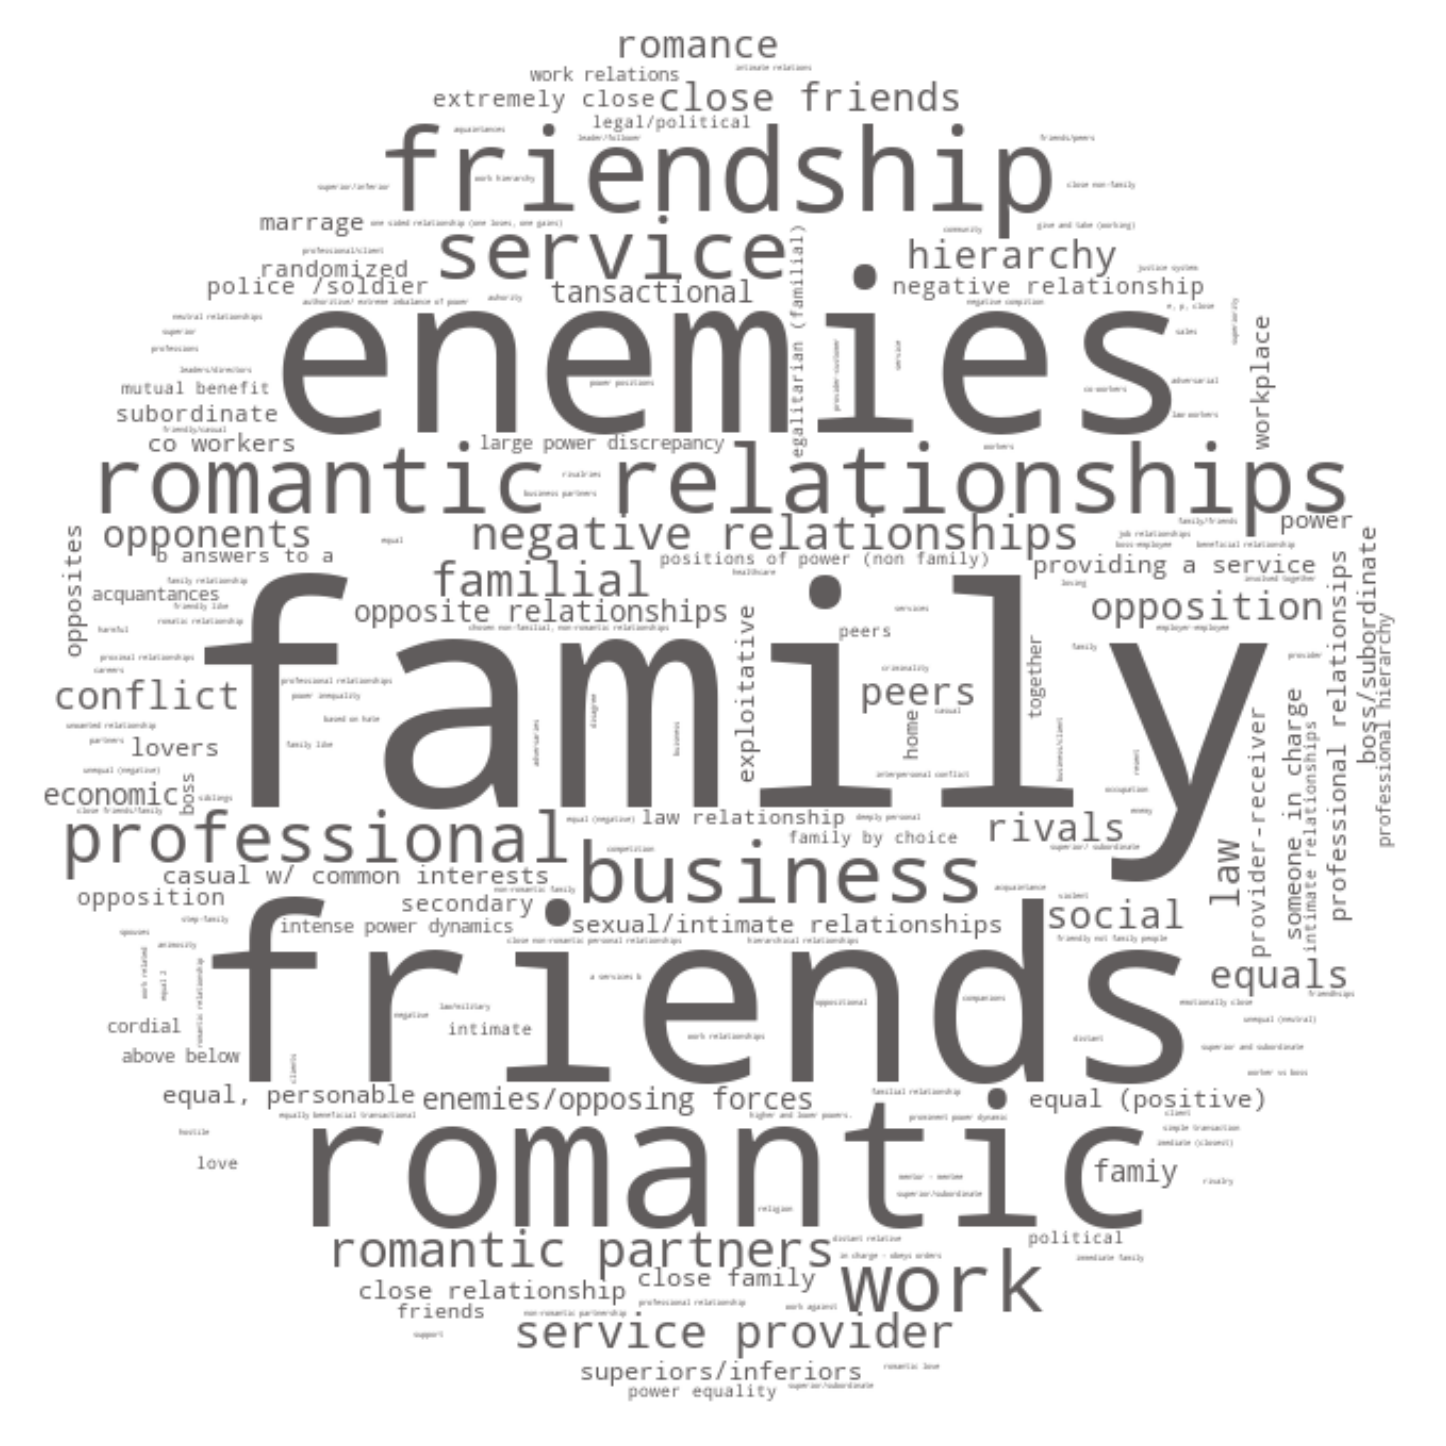

In [28]:
label_dmixed_list = list(target_df_selected.index)
label_dmixed_list = [i.lower() for i in label_dmixed_list]
label_dmixed_list = [i.split('_')[0] for i in label_dmixed_list]
label_freq = {i:label_dmixed_list.count(i) for i in set(label_dmixed_list)}

mask = np.array(Image.open('circle.jpg'))
wc = WordCloud(background_color='white',width=400,height=400,mask=mask,
               mode='RGBA',color_func=lambda *args, **kwargs: "#605C5C")
wc.fit_words(label_freq)
plt.figure(figsize=(6,6),dpi=300)

plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

<AxesSubplot: title={'center': 'Silhouette scores of second clustring analysis'}, xlabel='clusterCount', ylabel='silhouette'>

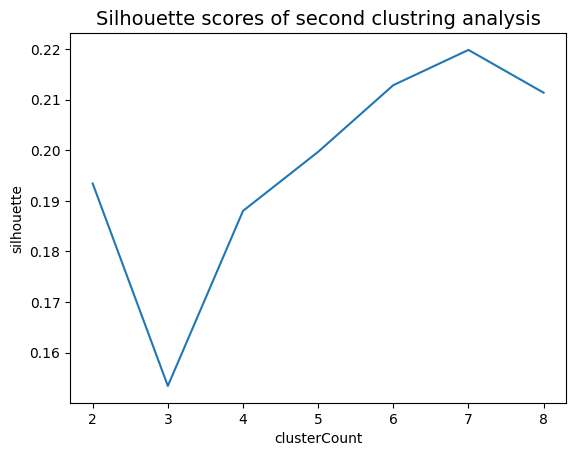

In [30]:
data = target_df_selected
resultsdf = pd.DataFrame({'clusterCount':[], 'silhouette':[]})
for index, k in enumerate(range(2, maxClusters)):
    HAC_model = AgglomerativeClustering(n_clusters=k,linkage = 'ward',affinity='euclidean').fit(data)
    cluster_labels = HAC_model.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    resultsdf = resultsdf.append({'clusterCount':k, 'silhouette':silhouette_avg}, ignore_index=True)

plt.title('Silhouette scores of second clustring analysis',size=14)
sns.lineplot(data=resultsdf, x="clusterCount", y="silhouette")

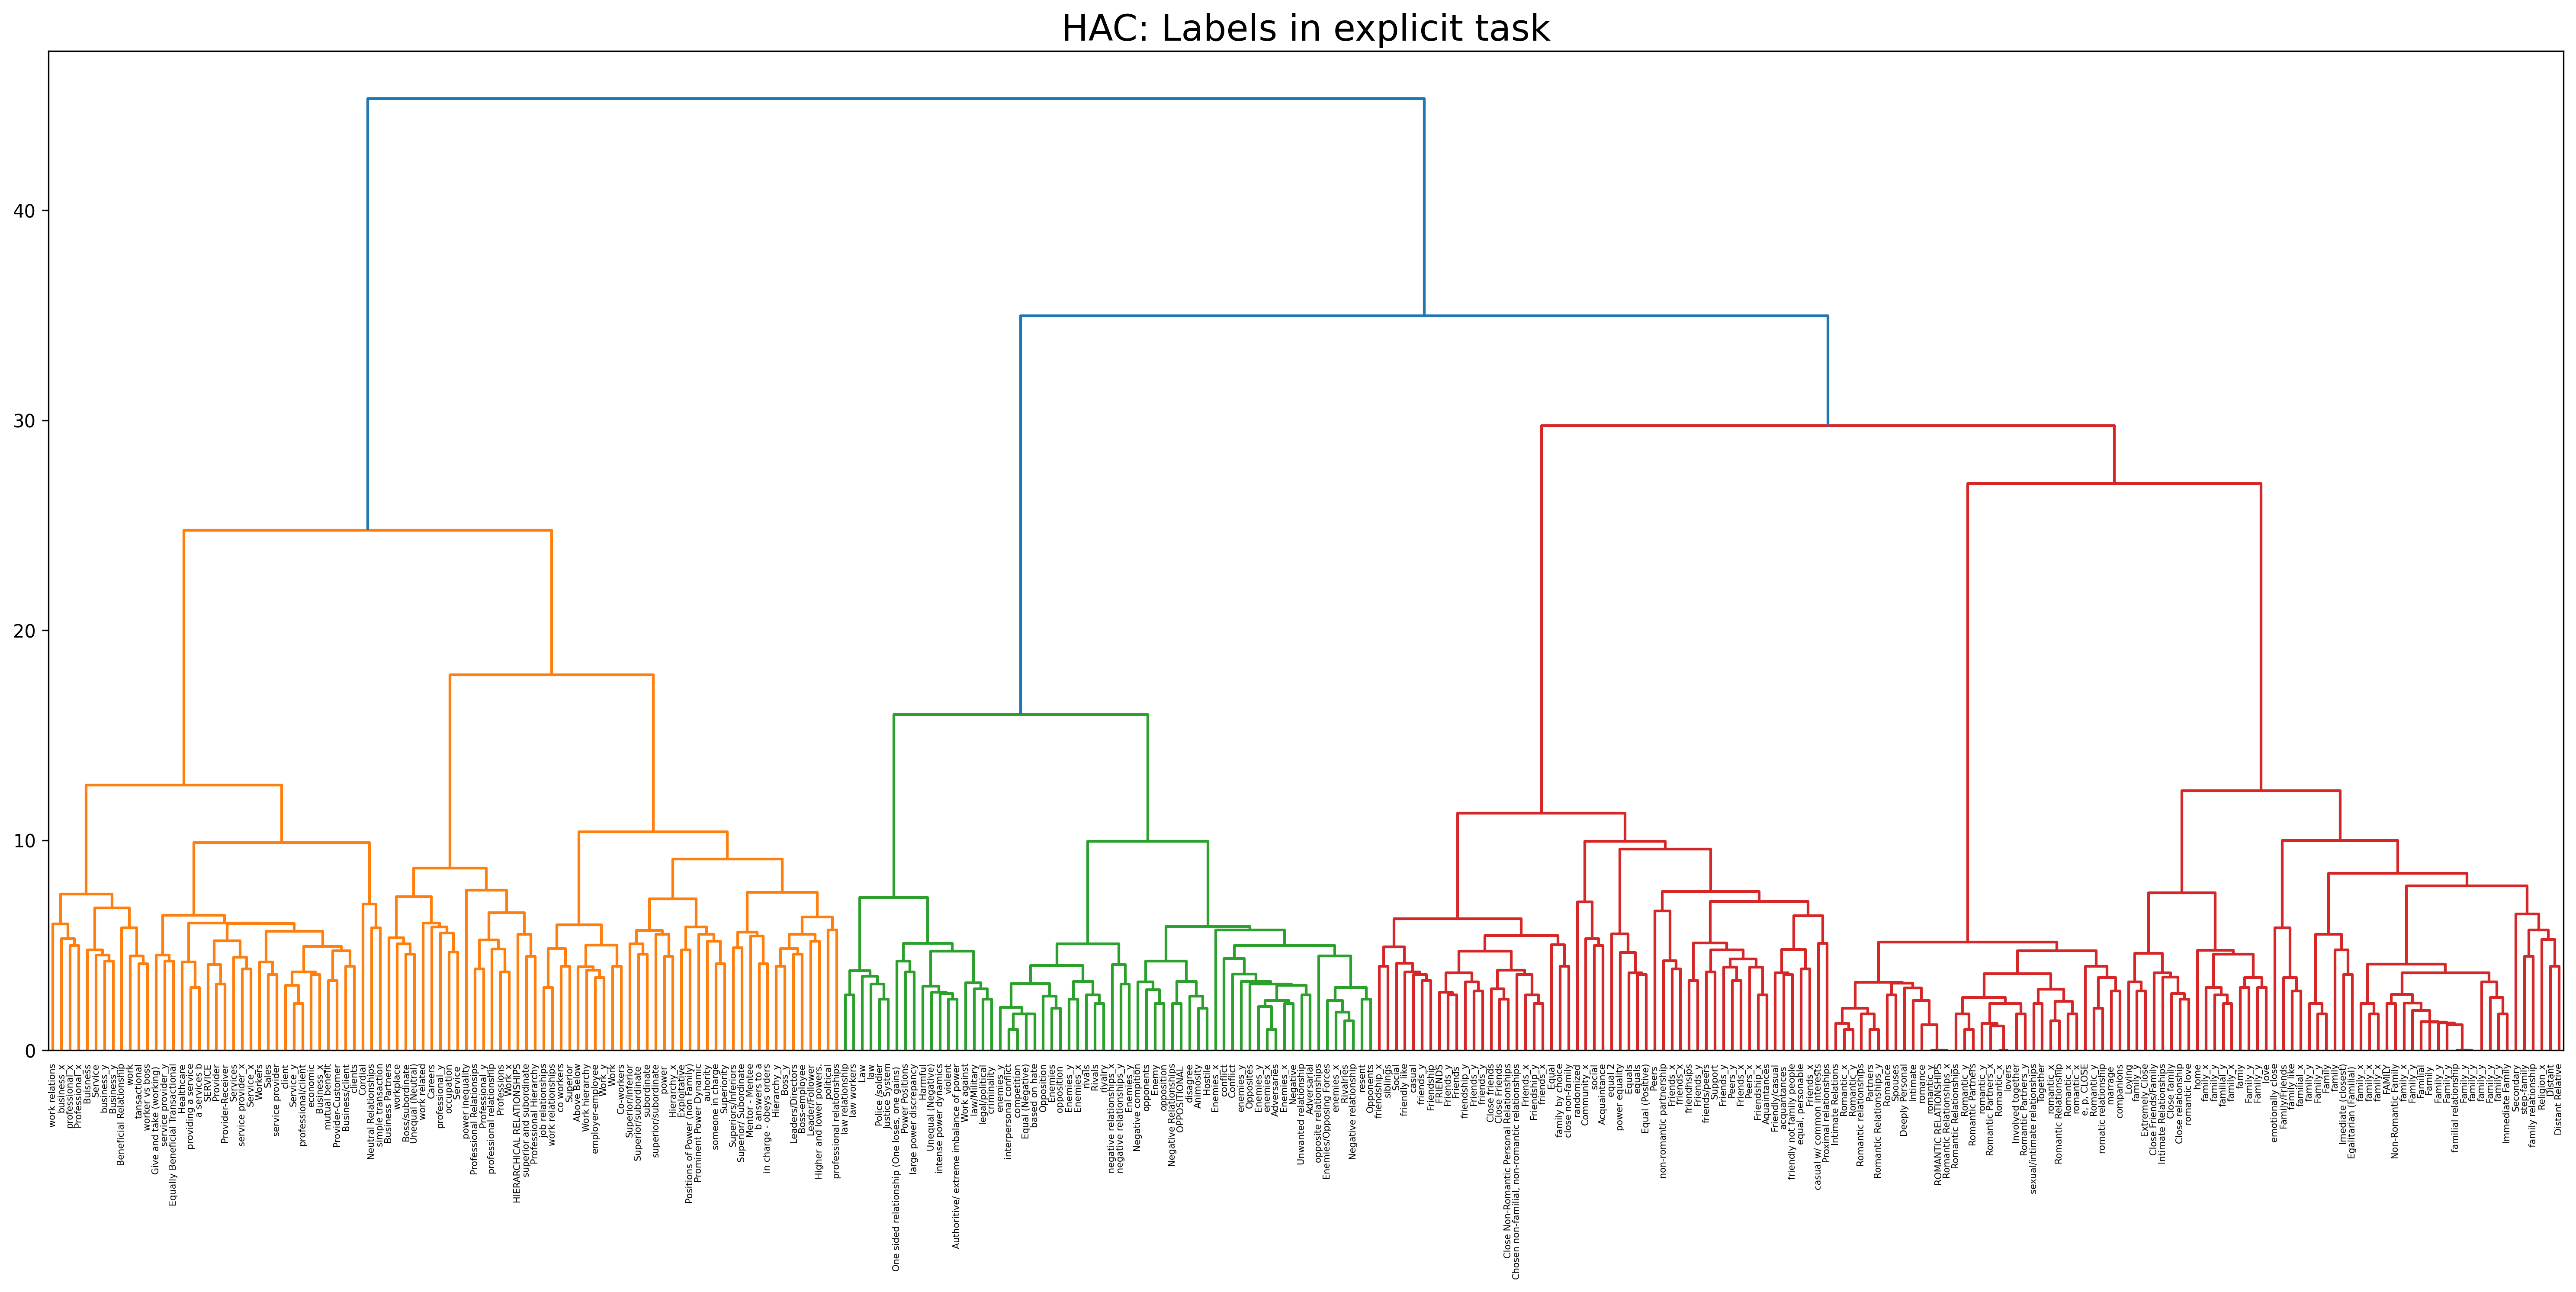

In [31]:
data = target_df_selected
plt.figure(figsize=(25, 10),dpi=300)
plt.title("HAC: Labels in explicit task",size=20)  
dend = dendrogram(linkage(data, method='ward',metric='euclidean'),
                 labels = list(data.index)) 

In [32]:
data = target_df_selected
ks = [3,4,5,6,7,8]
result_selected_df = pd.DataFrame(index=data.index)
for k in ks:   
    HAC_model = AgglomerativeClustering(n_clusters=k,linkage = 'ward').fit(data)
    cluster_labels = HAC_model.fit_predict(data)
    result_selected_df['cl_h'+str(k)] = cluster_labels
result_selected_df

cl_h3  cl_h4  cl_h5  cl_h6  cl_h7  cl_h8
famiy                       0      0      1      1      1      1
tansactional                1      1      0      5      2      0
Peers                       0      3      3      3      3      3
opposite relationships      2      2      2      2      0      5
Animosity                   2      2      2      2      0      5
...                       ...    ...    ...    ...    ...    ...
Romantic Relationship       0      0      4      4      4      4
Peers_x                     0      3      3      3      3      3
Familial                    0      0      1      1      1      1
power inequality            1      1      0      0      6      6
Community_x                 0      3      3      3      3      3

[292 rows x 6 columns]

In [33]:
result_selected_df.to_csv('HAC_results_final.csv')

In [35]:
cluster_results('cl_h3',result_df=result_selected_df)


Cluster 1 Relationship:138
famiy, Peers , sexual/intimate relationships, Chosen non-familial, non-romantic relationships, Romantic_x, Romantic_x, Romantic_x, e, p, CLOSE, lovers, familial_y, marrage , casual w/ common interests, equal, personable, Partners, randomized, equals, Family_y, Family_y, Family_y, Family_y, Family_y, Family_y, Family_y, Family_y, Close family, Romantic Relationships, Romantic_y, Romantic_y, Romantic_y, home, Family, Romance, Equal (Positive), acquantances , Involved together, Peers_y, Romantic Partners, love, Family/Friends, power equality, romance, Proximal relationships, family by choice, Loving, family_y, family_y, family_y, family_y, family_y, family_y, Friendship_x, Equals, Secondary, step-family, FAMILY, Non-Romantic Family, ROMANTIC RELATIONSHIPS, familial relationship, Together, friendship_y, Distant, companions, family like, FRIENDS, Friendly/casual, Friendship_y, Close Friends, Equal, Spouses, Romantic Relationships_x, friendhsips, family relationsh

<font size= 5>3 clusters</font>   
Cluster1: Close(138)     
Cluster2: Occupational(92)    
Cluster3: Hostile(62)     

In [36]:
cluster_results('cl_h4',result_df=result_selected_df)


Cluster 1 Relationship:85
famiy, sexual/intimate relationships, Romantic_x, Romantic_x, Romantic_x, e, p, CLOSE, lovers, familial_y, marrage , Partners, Family_y, Family_y, Family_y, Family_y, Family_y, Family_y, Family_y, Family_y, Close family, Romantic Relationships, Romantic_y, Romantic_y, Romantic_y, home, Family, Romance, Involved together, Romantic Partners, love, Family/Friends, romance, Loving, family_y, family_y, family_y, family_y, family_y, family_y, Secondary, step-family, FAMILY, Non-Romantic Family, ROMANTIC RELATIONSHIPS, familial relationship, Together, Distant, companions, family like, Spouses, Romantic Relationships_x, family relationship, Family , Close relationship, romantic love, Close Friends/Family, familial_x, Deeply Personal, Romantic Partners_y, Immediate Family, romantic_x, romantic_x, Romantic relationships, Imediate (closest), Intimate, Romantic Partners_x, emotionally close, family_x, family_x, family_x, family_x, family_x, family_x, family, romantic_y, 

In [37]:
cluster_results('cl_h5',result_df=result_selected_df)


Cluster 1 Relationship:92
tansactional, economic, power , Boss/subordinate, Superior/subordinate , Provider, someone in charge, Provider-Receiver, providing a service, workplace, co workers, Leaders/Directors, subordinate, Exploitative, b answers to a, Buisness, work relations, Business Partners, Hierarchy_y, mutual benefit, political, Business/client, service provider_y, SERVICE, Sales, worker vs boss, job relationships, superior and subordinate, Professions, Services, Positions of Power (non Family), work relationships, occupation, Give and take (working) , Hierarchy_x, Neutral Relationships, Equally Beneficial Transactional, Superiority, auhority, Above Below, Professional Relationsips, Service, Service_y, business_y, Boss-employee, service provider, Cordial, service provider_x, business_x, Work_x, Mentor - Mentee, Work, simple transaction, Superior, Business_y, Service_x, Professional_y, Superior/Inferior, Workers, HIERARCHICAL RELATIONSHIPS, a services b, professional relationshi

In [38]:
cluster_results('cl_h6',result_df=result_selected_df)


Cluster 1 Relationship:53
power , Boss/subordinate, Superior/subordinate , someone in charge, workplace, co workers, Leaders/Directors, subordinate, Exploitative, b answers to a, Business Partners, Hierarchy_y, political, job relationships, superior and subordinate, Professions, Positions of Power (non Family), work relationships, occupation, Hierarchy_x, Superiority, auhority, Above Below, Professional Relationsips, Boss-employee, Work_x, Mentor - Mentee, Work, Superior, Professional_y, Superior/Inferior, HIERARCHICAL RELATIONSHIPS, professional relationship, professional relationships, employer-employee, work related, Leader/Follower, Boss_y, Careers, Co-workers, Higher and lower powers., professional_y, Superiors/Inferiors, Work hierarchy, Service , Superior/ Subordinate, Work_y, Unequal (Neutral), Prominent Power Dynamic, superior/subordinate, Professional Hierarchy, in charge - obeys orders, power inequality

Cluster 2 Relationship:51
famiy, familial_y, Family_y, Family_y, Family

<font size= 5>6 clusters</font>   
Cluster1: Power(53)     
Cluster2: Familial(51)  
Cluster3: Hostile(62)     
Cluster4: Affiliation(53)  
Cluster5: Romantic(34)      
Cluster6: Transactional(39) 

# Different clusters of labels frequency analysis

## 6 clusters model

In [39]:
stopwords = {'a','b','e','of','p','w',
              'on','one','based','non','like','step','not','by','in','co','and','vs',
              'relationships','relationship','relation','relations','related'}

In [40]:
def Cluster_text(result_df,cluster_num,num,Cluster):
    HAC = list(result_df[result_df[cluster_num]==num].index)
    HAC = [i.split('_')[0] for i in HAC]
    HAC = [i.lower() for i in HAC]

    HAC_str = ''
    for i in HAC:
        HAC_str = HAC_str+' '+i 
        
    return HAC_str

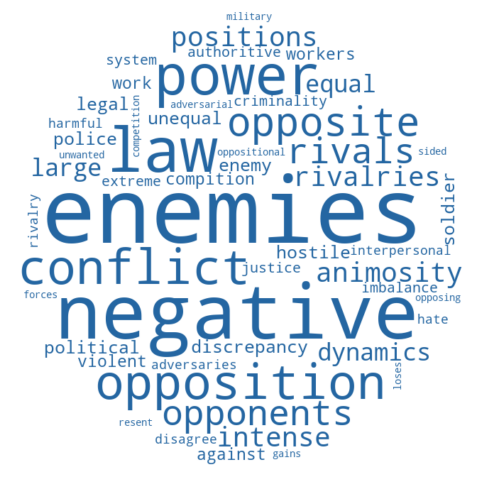

In [41]:
text = Cluster_text(result_selected_df,'cl_h6',2,'Hostile')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#2466A2").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

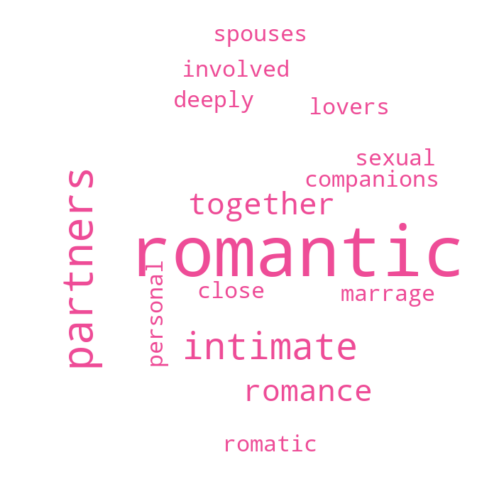

In [42]:
text = Cluster_text(result_selected_df,'cl_h6',4,'Romantic')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#EE4C97").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

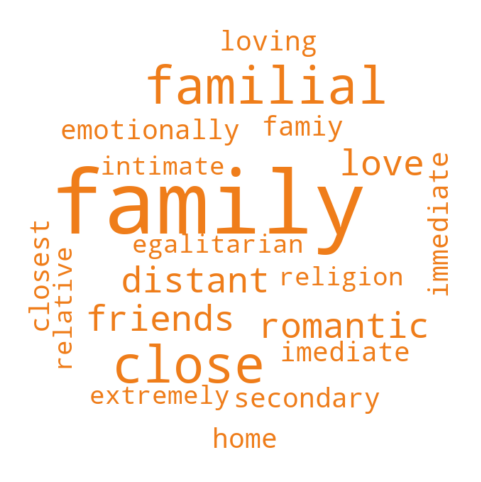

In [43]:
text = Cluster_text(result_selected_df,'cl_h6',1,'Familial')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#EF7D1A").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

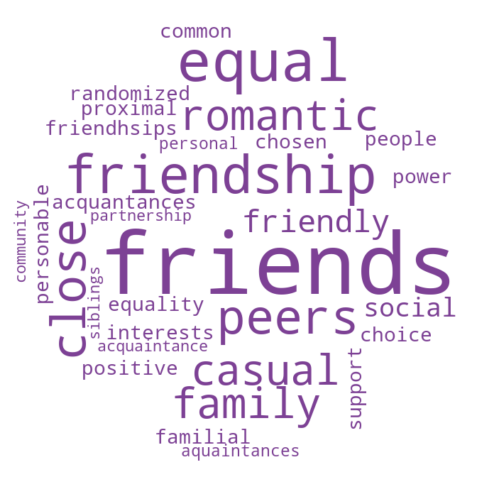

In [44]:
text = Cluster_text(result_selected_df,'cl_h6',3,'Affiliation')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#7D4195").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

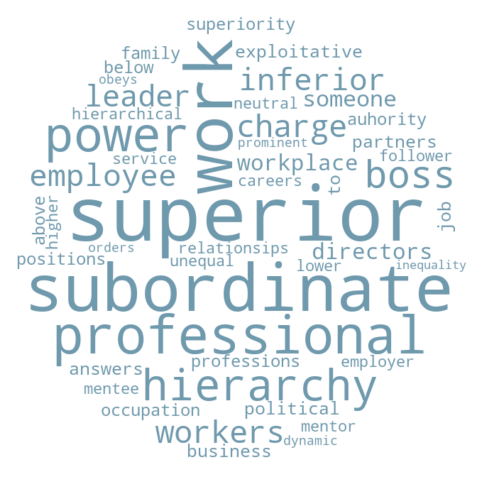

In [45]:
text = Cluster_text(result_selected_df,'cl_h6',0,'Power')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#6F99AD").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

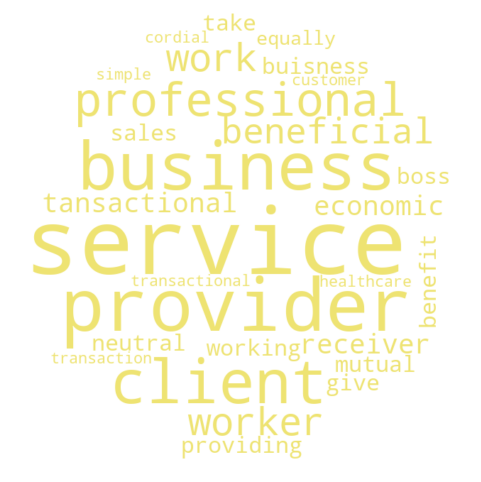

In [48]:
text = Cluster_text(result_selected_df,'cl_h6',5,'Transactional')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#EEE372").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

## 3 clusters model

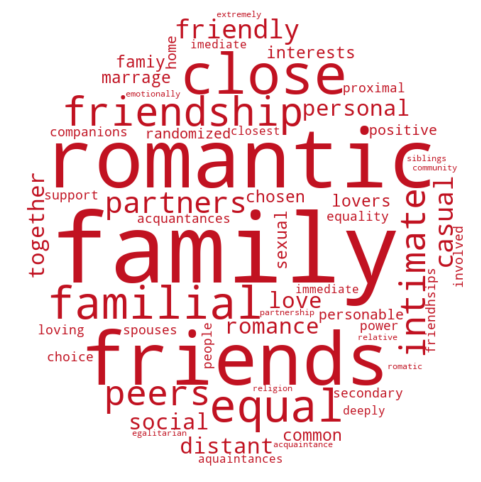

In [49]:
text = Cluster_text(result_selected_df,'cl_h3',0,'Close')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#C11221").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

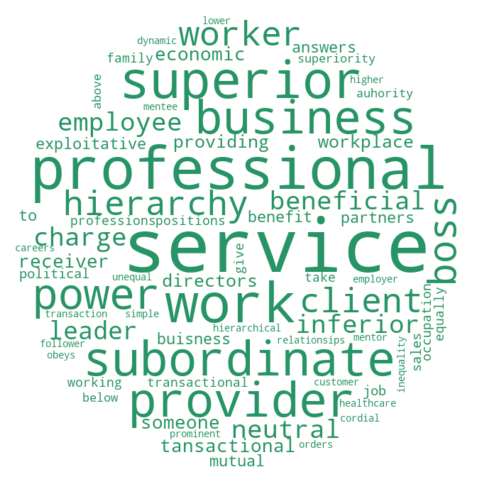

In [50]:
text = Cluster_text(result_selected_df,'cl_h3',1,'Occupational')
wc = WordCloud(stopwords=stopwords,background_color = 'white',mask=mask,
               width=400,height=400,mode='RGBA',color_func=lambda *args, **kwargs: "#269464").generate(text)

plt.figure(figsize=(6,6))
plt.imshow(wc,interpolation="bilinear")  
plt.axis("off")  
plt.show()

# Each participant's answer

In [51]:
num = 10
for subj in ca_subj_data_paths:
    
    if meadows_soc_id_key[meadows_soc_id_key['meadows_id'] == subj.split('_')[num]].index.empty:
        continue
    else:  # If match is found, this runs
        soc_id = meadows_soc_id_key[meadows_soc_id_key['meadows_id'] == subj.split('_')[num]].index[0]
        soc_id = soc_id.replace('soc','sub')
        
    ############ different format of dataframe
    #Separate the two conditons where some had index of numbers while others not.
    if soc_id in subj_no_list:
        subj_cat_df = pd.read_csv(subj)
    else:
        subj_cat_df = pd.read_csv(subj).iloc[:, 1:]
    ############ 
    print('####################################################')
    print(subj.split('_')[num]+"/"+soc_id)
    
    labels_list = list(subj_cat_df.columns)

    for i in labels_list:
        print(i+':')
        rels = subj_cat_df[i].dropna()
        for rel in rels:
            print(rel, end='  ')
        print()
        print()

####################################################
amazed-cub/sub-691
Boss:
Between Alumni  Between Co-workers  Boss - Secretary  Chef - Customer  Chief - Deputy  Driver - Passenger  Employer - Employee  Entrepreneur - Investor  Foreman - Laborer  Landlord - Housekeeper  Master - Servant  Mentor - Mentee  Mother - Infant  Principal - Teacher  Reader - Writer  Researcher - Research-subject  Slave - Master  Superior - Subordinate  University student - Administrator  Volunteer - Organizer  

Coach/leader:
Athletic trainer - Trainee  Club-member - Club-president  Coach - Athlete  Customer - Businessman  Customer - Server  Enemies  Guest - Host  Guide - Tourist  Intern - Employee  Interviewer - Job applicant  Judge - Contestant  Landlord - Tenant  Leader - Follower  Manager - Staff  Native - Tourist  Owner - Manager  Patient - Caretaker  Political allies  Professor - Graduate student  Reviewer - Writer  Sorority sisters  Supervisor - Subordinate  Union-leader - Union-member  

Healthcare: